### Import useful libraries and helpers

In [1]:
%run "Imports.ipynb"
%run "Helpers.ipynb"

### Load the data

In [2]:
df_all = pd.read_pickle("df_all.pkl")

In [6]:
df_all_dropna = df_all.dropna()

In [7]:
df_all_dropna.head()

,Unnamed: 0,zone,timestamp,supply,forecast,date,time,new_year,new_year_week,epiphany,...,other,temperature_max,temperature_min,rain,sat_or_sun,holidays,holidays_week,x_coordinate,y_coordinate,weekday
8986,37925,0_4_10_10,2019-01-08 04:00:00,0,1.0,2019-01-08,04:00:00,0,0.0,0,...,0,-0.555556,-6.111111,2.032,0,0,0.0,0,4,Tuesday
8987,37926,0_4_10_10,2019-01-08 05:00:00,0,0.0,2019-01-08,05:00:00,0,0.0,0,...,0,-0.555556,-6.111111,2.032,0,0,0.0,0,4,Tuesday
8988,37927,0_4_10_10,2019-01-08 06:00:00,1,0.0,2019-01-08,06:00:00,0,0.0,0,...,0,-0.555556,-6.111111,2.032,0,0,0.0,0,4,Tuesday
8989,37928,0_4_10_10,2019-01-08 07:00:00,1,0.0,2019-01-08,07:00:00,0,0.0,0,...,0,-0.555556,-6.111111,2.032,0,0,0.0,0,4,Tuesday
8990,37929,0_4_10_10,2019-01-08 08:00:00,0,0.0,2019-01-08,08:00:00,0,0.0,0,...,0,-0.555556,-6.111111,2.032,0,0,0.0,0,4,Tuesday


In [8]:
df_all_dropna.to_pickle("df_all_dropna.pkl")

In [4]:
zone_names = df_all['zone'].unique()

In [5]:
DataFrameDict = {elem : pd.DataFrame for elem in zone_names}

for key in DataFrameDict.keys():
    DataFrameDict[key] = df_all[:][df_all.zone == key]

In [6]:
plotData = pd.DataFrame({"zone": zone_names})
plotData['mean_supply'] = plotData.apply (lambda row: DataFrameDict[row['zone']]['supply'].mean(), axis=1)
plotData['prophet_prediction'] = plotData.apply (lambda row: single_zone_prophet_forecast_improved(DataFrameDict[row['zone']], '2019-12-31 00:00:00'), axis=1)

In [7]:
plotData.to_pickle("plotData2.pkl")

In [8]:
plotData = pd.read_pickle("plotData2.pkl")

In [9]:
plotData['naive_prediction'] = plotData.apply (lambda row: single_zone_naive_forecast(DataFrameDict[row['zone']], '2019-12-31 00:00:00'), axis=1)

In [10]:
plotData['improvement'] = plotData.apply (lambda row: row['naive_prediction'] > row['prophet_prediction'], axis=1)

In [11]:
plotData['improvement_num'] = plotData.apply (lambda row: row['naive_prediction'] - row['prophet_prediction'], axis=1)

In [12]:
plotData.head()

,zone,mean_supply,prophet_prediction,naive_prediction,improvement,improvement_num
0,0_0_10_10,0.025693,2.514885,1.812500,False,-0.702385
1,0_1_10_10,0.049296,2.545799,1.454545,False,-1.091254
2,0_3_10_10,0.015775,2.094432,1.720000,False,-0.374432
3,0_4_10_10,0.466854,1.183262,1.206989,True,0.023728
4,0_5_10_10,0.110717,1.818942,1.812500,False,-0.006442


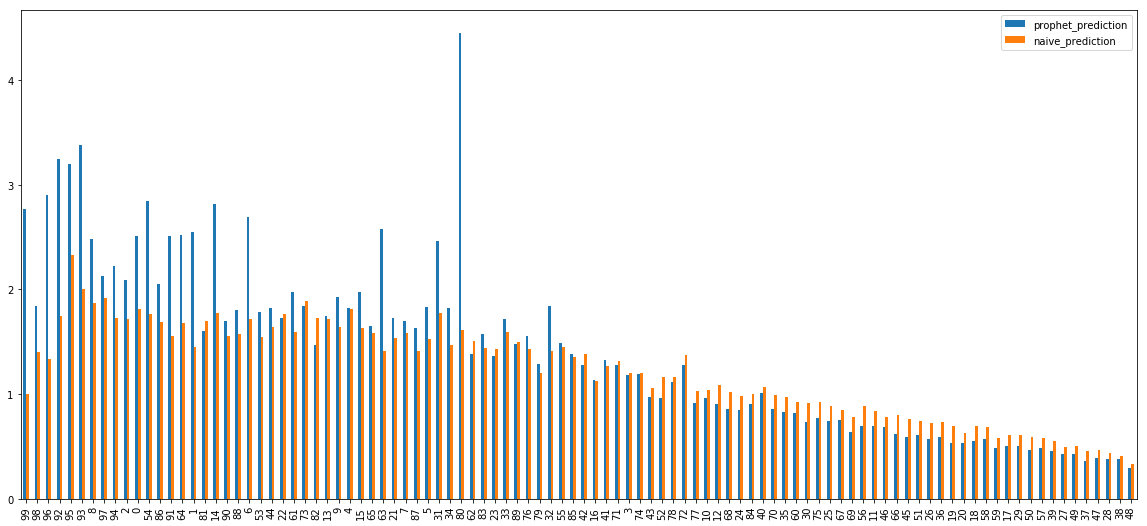

In [13]:
# plt.figure(figsize=(12, 9))
plotData.sort_values('mean_supply', ascending=True)[['prophet_prediction','naive_prediction']].plot.bar(figsize=(20, 9),stacked=False)

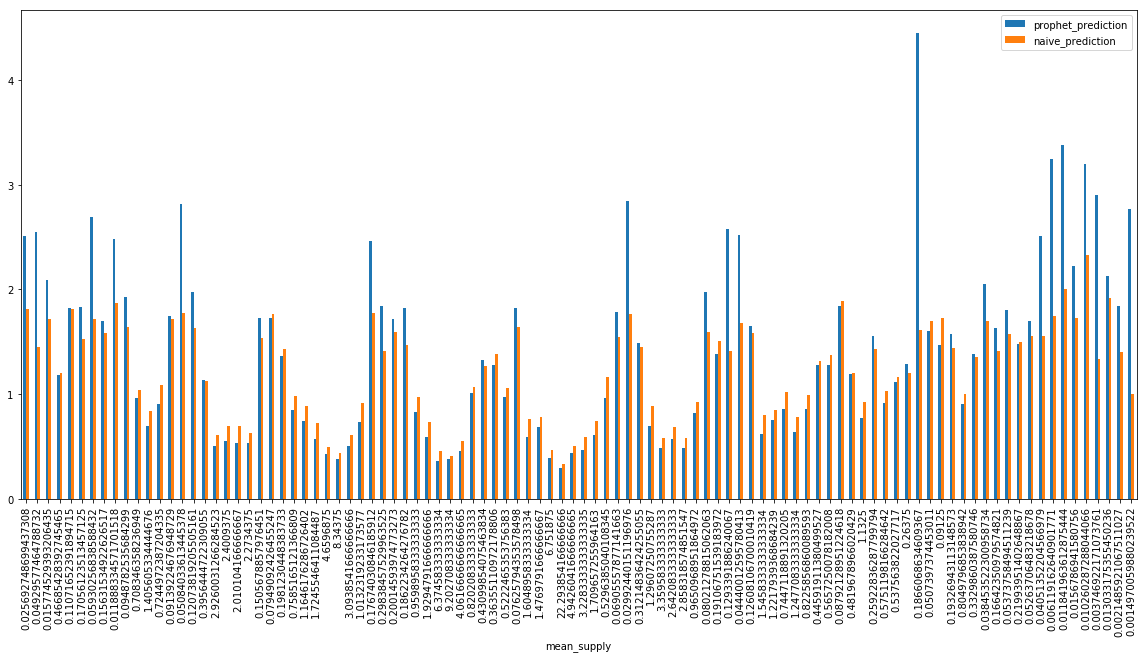

In [14]:
plotData.plot(x="mean_supply", y=['prophet_prediction','naive_prediction'], kind="bar", figsize=(20, 9))

In [15]:
sorted = plotData.reset_index().sort_values('mean_supply')

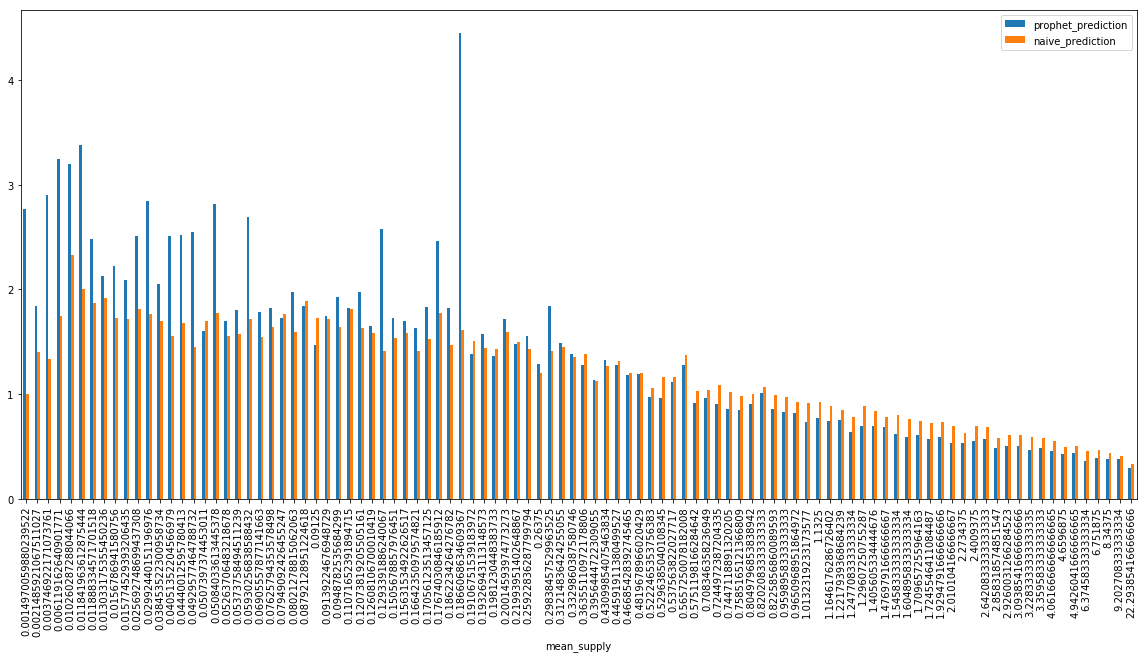

In [16]:
sorted.plot(x="mean_supply", y=['prophet_prediction','naive_prediction'], kind="bar", figsize=(20, 9))

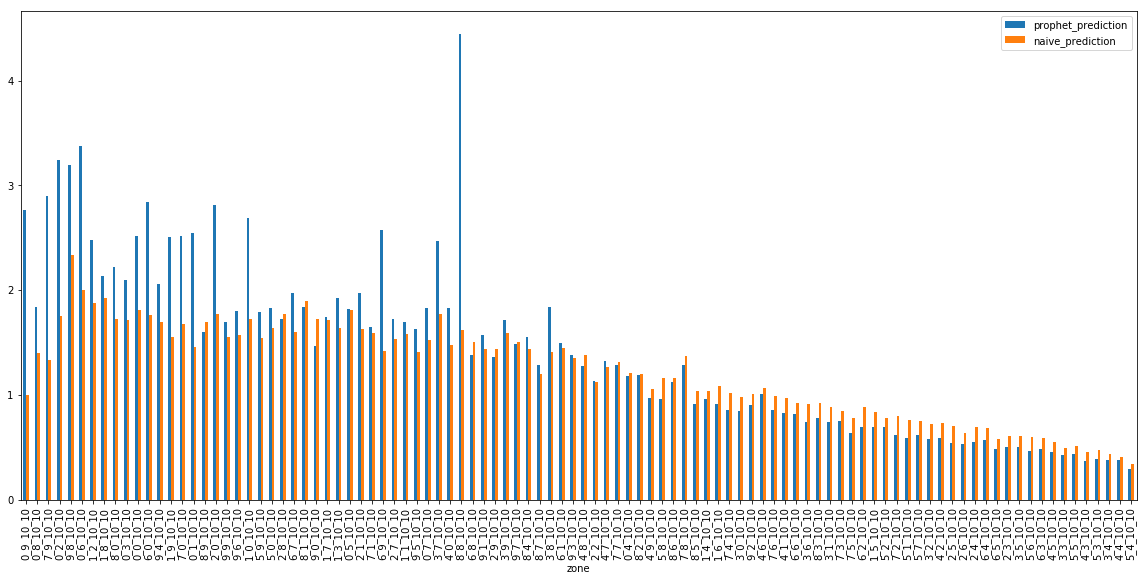

In [17]:
sorted.plot(x="zone", y=['prophet_prediction','naive_prediction'], kind="bar", figsize=(20, 9))

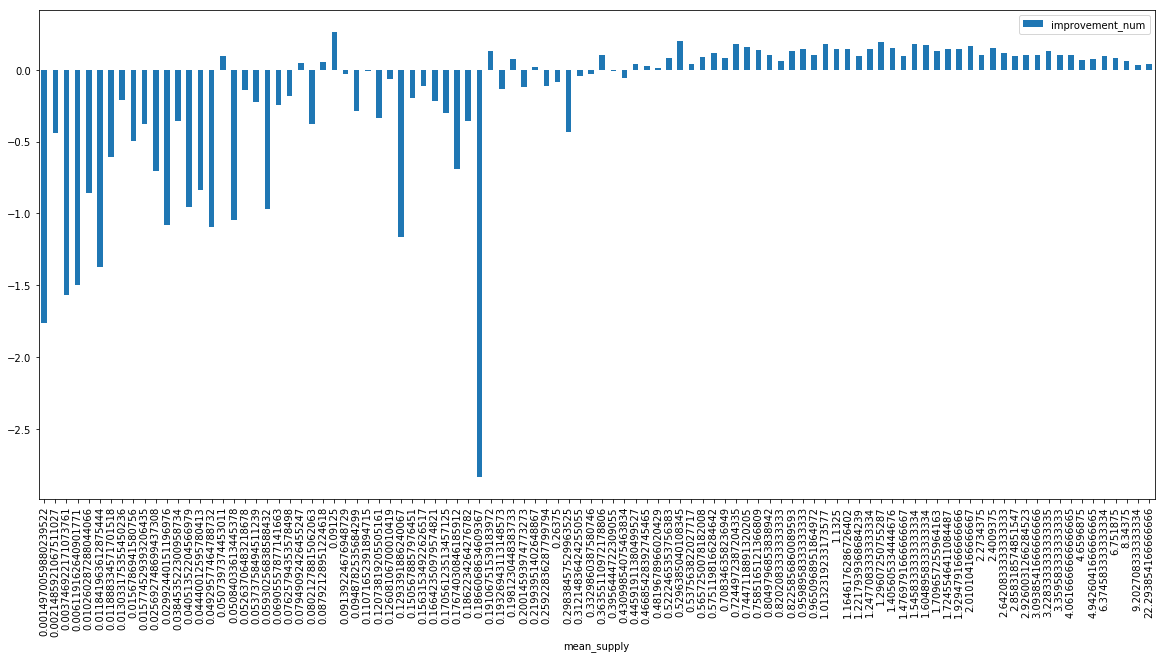

In [19]:
sorted.plot(x="mean_supply", y=['improvement_num'], kind="bar", figsize=(20, 9))

In [45]:
final_success_metric(df_all_dropna)

1.677205685618728

In [17]:
naive_final_result

3.650783765

In [18]:
supply = df_all_dropna.groupby('zone').supply
supply

In [19]:
supply

In [29]:
grouped_by_timestamp = df_all_dropna.groupby('timestamp')

In [3]:
df_all_dropna = pd.read_pickle("df_all_dropna.pkl")

In [22]:
def add_final_forecast(df,cut_date):
    grouped_by_zone = df.groupby('zone')
    
    for name, group in grouped_by_zone:   
        if group['supply'].mean(axis = 0) > 0.26:
            print(name + ': prophet')
            final_forecast = return_single_zone_prophet_forecast(group, cut_date)
            print(final_forecast)
            for r_idx, row in group.iterrows():
                i = 0
#                 print(r_idx)
                df.loc[r_idx, 'final_forecast'] = results.loc[i,'final_forecast']
                i = i + 1
        else:
            print(name + ': naive')
            for r_idx, row in group.iterrows():
                i = 0
                df.loc[r_idx, 'final_forecast'] = df.loc[r_idx, 'forecast']
                i = i + 1
    return df            

In [23]:
add_final_forecast(df_all_dropna,'2020-01-31 00:00:00')

0_0_10_10: naive
0_1_10_10: naive
0_2_10_10: naive
0_3_10_10: naive
0_4_10_10: prophet
nan


NameError: name 'results' is not defined

In [57]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375156 entries, 8986 to 386132
Data columns (total 40 columns):
Unnamed: 0                  375156 non-null int64
zone                        375156 non-null object
timestamp                   375156 non-null datetime64[ns]
supply                      375156 non-null int64
forecast                    375156 non-null float64
date                        375156 non-null datetime64[ns]
time                        375156 non-null object
new_year                    375156 non-null int64
new_year_week               375156 non-null float64
epiphany                    375156 non-null int64
epiphany_week               375156 non-null float64
winter_holidays_1           375156 non-null int64
winter_holidays_2           375156 non-null int64
winter_holidays_3_warsaw    375156 non-null int64
winter_holidays_4           375156 non-null int64
easter                      375156 non-null int64
labour_day                  375156 non-null int64
constituti